<a href="https://colab.research.google.com/github/p42777/dsfcs23/blob/main/01_ZeroAccess/hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ZeroAccess

An interesting data set
* Where ZeroAccess occurs? Any patterns?
* What kind of users are easily to be infected? Does education or income affect infection rate?
* Does UFO cause ZeroAccess infection?



## **Question #0:**

Your name, student ID, department. If you skip this question, no points will be given. 

Answer #0: 資管三 109306061 呂學柏

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
z_df = pd.read_csv("https://drive.google.com/uc?id=13iE3A-OO_oWZrEvDmpN_nA6yPfLpCiZv") # zeroaccess.csv
s_df = pd.read_csv("https://drive.google.com/uc?id=13nE04n2MwRAMFSPxS96dYMe1RYgZujxS") # state-internets.csv
c_df = pd.read_csv("https://drive.google.com/uc?id=13qH1zWX4FQGNo43m_7ufSsDUbYUxa81O") # county-data.csv

In [ ]:
print(z_df.shape, s_df.shape, c_df.shape)

(808446, 2) (49, 3) (3072, 6)


In [ ]:
z_df.head()

,lat,long
0,-10.0000,-55.0000
1,38.0888,-78.5592
2,38.9990,-84.6266
3,48.6210,7.4944
4,43.2342,-86.2484


In [ ]:
s_df.head()

,state,population,internet
0,Alabama,4758191,3092273
1,Arizona,6665093,5230474
2,Arkansas,2919815,1949869
3,California,37350092,29758896
4,Colorado,5077553,4058749


In [ ]:
c_df.head()

,subregion,region,pop,income,ipaddr,ufo2010
0,abbeville,south carolina,25101,34670,30330,2
1,acadia,louisiana,61912,37970,38203,6
2,accomack,virginia,33341,41595,41338,2
3,ada,idaho,409061,55304,1035427,59
4,adair,iowa,7481,47623,3762,0


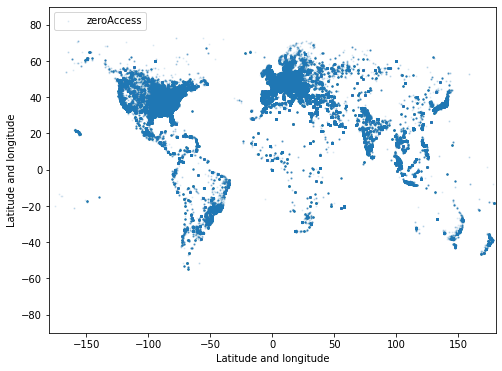

In [ ]:
# plot zeroAccess infection instances on a earth map
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(z_df.long, z_df.lat, alpha = 0.1, s = 1, label = "zeroAccess")
ax.set_xlim((-180, 180))
ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap
mapa = folium.Map(location=(10, 10), zoom_start=1.5, tiles="Stamen Toner", height="50%", width="50%")
loc_li = list(zip(list(z_df.lat), (z_df.long)))[:10000] # <-- change data size
HeatMap(loc_li, radius=15).add_to(mapa) # <-----------------------change radius
mapa

## **Reverse Geocoding**



In [ ]:
!pip install reverse_geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=940237e60063da6bee6d764f9df2507c2d73fa27ef7aa2cd394986daa863d211
  Stored in directory: /root/.cache/pip/wheels/10/05/be/d2edd4ff207cf625ce8bd20cf1493c27838828e8920aff9f4e
Successfully built reverse_geocoder


In [ ]:
import reverse_geocoder
# {'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 
#  'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}

# quick implementation
def rgr(s):
  cord_li = [(s[0], s[1])]
  result_dict_li = reverse_geocoder.search(cord_li)
  ret_ser = pd.Series(dict(result_dict_li[0]))
  return ret_ser.drop(labels=['lat', 'lon'])

# batch implementation
def rgr_batch(lat_long_df):
  cord_li = []
  for ind in lat_long_df.index:
    cord_li.append((lat_long_df['lat'][ind], lat_long_df['long'][ind]))
  result_dict_li = reverse_geocoder.search(cord_li)
  return pd.DataFrame(result_dict_li).drop(["lat", "lon"], axis = 1)

In [ ]:
# quick implementation
'''
sample_df = z_df.head(50) # <------ only use some data, because it takes time
country_df = sample_df.apply(lambda s: rgr(s), axis = 1)
df = sample_df.join(country_df)
df
'''

'\nsample_df = z_df.head(50) # <------ only use some data, because it takes time\ncountry_df = sample_df.apply(lambda s: rgr(s), axis = 1)\ndf = sample_df.join(country_df)\ndf\n'

In [ ]:
# batch implementation
sample_df = z_df.head(50000) 
country_df = rgr_batch(sample_df)
df = sample_df.join(country_df).rename(columns={'name':'City', 'admin1': 'State', 'admin2':'County', 'cc':"country_code", })
df

Loading formatted geocoded file...


,lat,long,City,State,County,country_code
0,-10.0000,-55.0000,Alta Floresta,Mato Grosso,Alta Floresta,BR
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
3,48.6210,7.4944,Marlenheim,Alsace,Departement du Bas-Rhin,FR
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
...,...,...,...,...,...,...
49995,53.1271,18.0200,Bydgoszcz,Kujawsko-Pomorskie,Bydgoszcz,PL
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49997,43.5417,21.7078,Aleksinac,Central Serbia,Nisavski Okrug,RS
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


## **Question #1:**
Extract some information from df. How many ZeroAccess attacks are observed in each country? 

Show the statistics in a dataframe and print it.

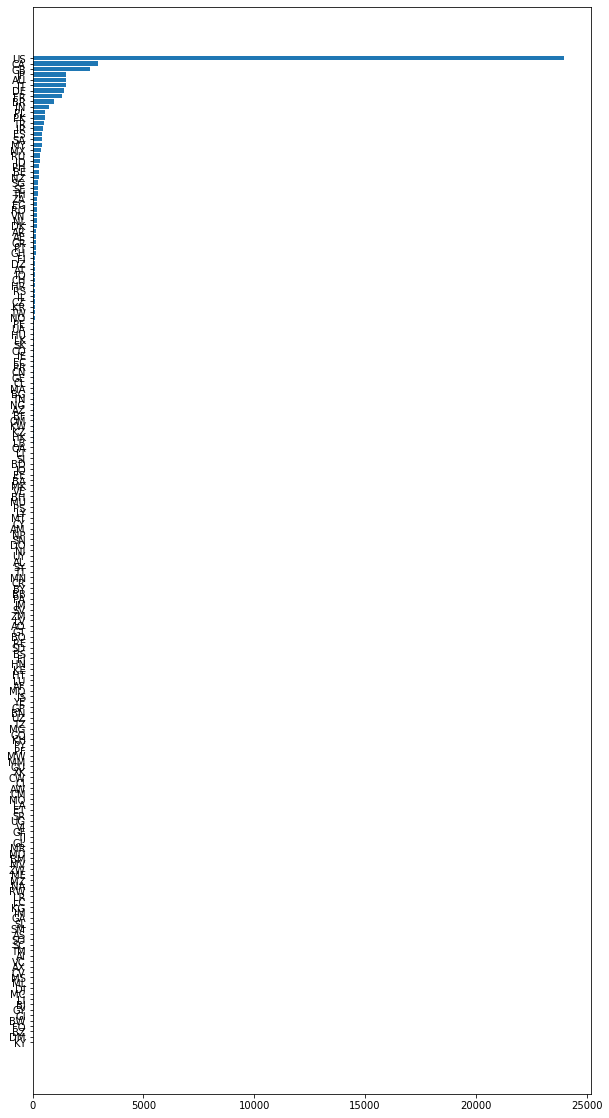

In [ ]:
countries = df.groupby(['country_code']).size()
country_number = countries.sort_values()

plt.figure(figsize=(10,20))
plt.barh(country_number.index, country_number.values)
plt.show()

## **Question #2:**

Plot a figure to show % of attack in each country. 
Ignore countries that are < 1%.

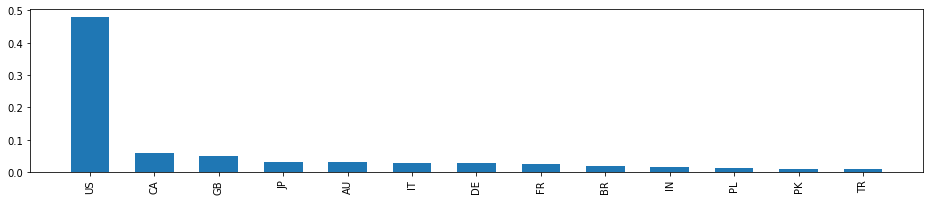

In [ ]:
country_counts = df['country_code'].value_counts(normalize=True)
country_counts = country_counts[country_counts.values > 0.01]

plt.figure(figsize=(16,3))
plt.bar(country_counts.index, country_counts.values, width=0.6)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Print the ratio here as shown below.
country_counts

US    0.47974
CA    0.05932
GB    0.05128
JP    0.03008
AU    0.03002
IT    0.02964
DE    0.02824
FR    0.02622
BR    0.01928
IN    0.01496
PL    0.01154
PK    0.01096
TR    0.01052
Name: country_code, dtype: float64

## **Question #3:**

Which state/city has severe ZeroAccess attack? Why? (open question)

(Kansas)

In [ ]:
df_us = df[df["country_code"] == "US"]
df_us

,lat,long,City,State,County,country_code
1,38.0888,-78.5592,Charlottesville,Virginia,City of Charlottesville,US
2,38.9990,-84.6266,Florence,Kentucky,Boone County,US
4,43.2342,-86.2484,Muskegon,Michigan,Muskegon County,US
6,44.8012,-68.7778,Bangor,Maine,Penobscot County,US
8,36.0580,-88.8253,Bradford,Tennessee,Gibson County,US
...,...,...,...,...,...,...
49992,40.6374,-79.7264,Brackenridge,Pennsylvania,Allegheny County,US
49994,38.4380,-122.6753,Santa Rosa,California,Sonoma County,US
49996,42.6757,-82.7773,New Baltimore,Michigan,Macomb County,US
49998,28.2397,-82.7388,New Port Richey,Florida,Pasco County,US


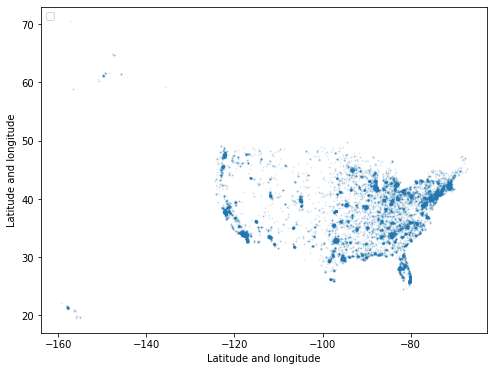

In [ ]:
# Try to write codes to show the following map.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(df_us.long, df_us.lat, alpha = 0.1, s = 1)
# ax.set_xlim((-180, 180))
# ax.set_ylim((-90, 90))

plt.xlabel("Latitude and longitude")
plt.ylabel("Latitude and longitude")
plt.legend(loc='upper left')

plt.show()

In [ ]:
df_us["State"].value_counts()

California          2293
Texas               2003
Florida             1425
Kansas              1371
New York            1315
Pennsylvania         970
Illinois             948
Ohio                 914
Georgia              841
North Carolina       759
Michigan             715
New Jersey           669
Virginia             526
Arizona              503
Washington           502
Missouri             480
Wisconsin            472
Indiana              458
Massachusetts        453
Maryland             430
Tennessee            425
Alabama              412
Minnesota            405
Colorado             394
South Carolina       386
Kentucky             373
Louisiana            366
Oklahoma             293
Arkansas             262
Mississippi          241
Oregon               235
Iowa                 228
Connecticut          226
Nevada               187
Utah                 164
West Virginia        161
Nebraska             144
New Mexico           133
Maine                113
Idaho                 99


In [ ]:
df_us.groupby(['State', 'City']).size().sort_values(ascending=False)

State           City       
Kansas          Peabody        1152
Texas           Houston         238
California      Los Angeles     179
Illinois        Chicago         144
Arizona         Phoenix         142
                               ... 
California      Dixon             1
Louisiana       Sulphur           1
                Springhill        1
North Carolina  Williamston       1
California      Mariposa          1
Length: 6660, dtype: int64

## **Question #4:**

Is there anything wrong with these states?

In [ ]:
df_us_state = pd.DataFrame(df_us["State"].value_counts())
df_us_state.columns = ["attack"]
df_us_state["att_pc"] = df_us_state["attack"] / df_us_state["attack"].sum()
df_us_state

,attack,att_pc
California,2293,0.095593
Texas,2003,0.083504
Florida,1425,0.059407
Kansas,1371,0.057156
New York,1315,0.054821
Pennsylvania,970,0.040439
Illinois,948,0.039521
Ohio,914,0.038104
Georgia,841,0.035061
North Carolina,759,0.031642



We see that the number of attacks from the top five states is accounted for almost one-third of the number of attacks within the whole region.

## **Question #5:**

Are the attack occurances in each state related to state population?

Try a bar chart!

In [ ]:
df_us_state.head()

,attack,att_pc
California,2293,0.095593
Texas,2003,0.083504
Florida,1425,0.059407
Kansas,1371,0.057156
New York,1315,0.054821


In [ ]:
df_att_pop = pd.concat([s_df, df_us_state], axis=1, sort=True).sort_values(by=["att_pc"], ascending=False)
df_att_pop = df_att_pop.drop("District of Columbia")
df_att_pop

,population,internet,pop_pc,attack,att_pc
California,37350092.0,29758896.0,0.121181,2293.0,0.095593
Texas,25042738.0,17176661.0,0.081250,2003.0,0.083504
Florida,18732783.0,14764418.0,0.060778,1425.0,0.059407
Kansas,2848369.0,2248721.0,0.009241,1371.0,0.057156
New York,19746813.0,16091772.0,0.064068,1315.0,0.054821
Pennsylvania,12737230.0,9909482.0,0.041325,970.0,0.040439
Illinois,13046084.0,10243294.0,0.042327,948.0,0.039521
Ohio,11663946.0,8949773.0,0.037843,914.0,0.038104
Georgia,9932505.0,7597608.0,0.032226,841.0,0.035061
North Carolina,9479467.0,6809315.0,0.030756,759.0,0.031642


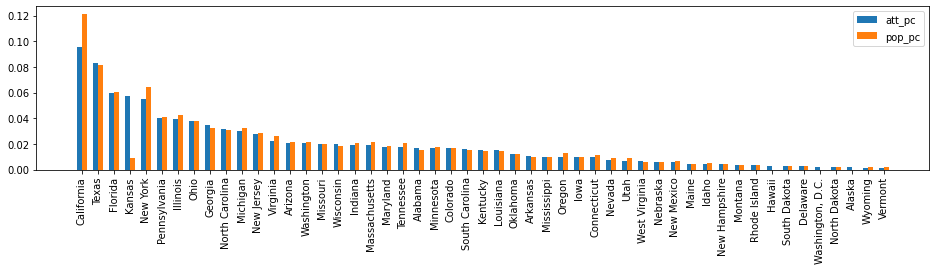

In [ ]:
plt.figure(figsize=(16, 3))
index = np.arange(len(df_att_pop.index))
plt.bar(index, df_att_pop.att_pc, 0.3, label="att_pc")
plt.bar(index + 0.3, df_att_pop.pop_pc, 0.3, label="pop_pc")
plt.legend(loc="upper right")
plt.xticks(index+.3 / 2, df_att_pop.index, rotation=90)
plt.show()

## **Answer #5:**

We see that for most of the states, there's a positive correlation between population and the number of attacks.

However, this is not the case in Kansas, although the population in Kansas is not large, the state is suffering unexpectedly high attacks.

## **UFO**

Try to use county-data.csv data to predict the attack counts for each state by liner regression. (You may copy the code in the lecture and use a simple library to calculate the result.)

Which feature is the most 'sensetive' to UFO sightings?

In [ ]:
c_df = c_df.groupby(by=["region"]).sum()
c_df.head()

,pop,income,ipaddr,ufo2010
region,,,,
alabama,4822023,2522962,22542601,250
arizona,6532974,612727,62062174,1250
arkansas,2949131,2677866,4810526,265
california,38041430,3241756,156511903,3769
colorado,5129284,3206281,22787577,513


In [ ]:
# df_att_pop.head()
df_att_pop.index = [x.lower() for x in df_att_pop.index]

In [ ]:
# The answer is shown below, but you should write codes
# to get the result.
#
# attack = 
# +6.122032984138616e-05 * pop
# +4.277635450980529e-05 * income
# +1.396537881311090e-07 * ipaddr
# -0.02791476271308256   * ufo2010
# -10.960810232575625

df_pred = pd.concat([c_df, df_att_pop], axis=1, sort=True)
df_pred = df_pred[["pop", "income", "ipaddr", "ufo2010", "attack", "att_pc", "pop_pc"]]
df_pred = df_pred.dropna()
df_pred.head(50)

from sklearn.linear_model import LinearRegression
X_train = df_pred[["pop", "income", "ipaddr", "ufo2010"]]
y_train = df_pred[["attack"]]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# print with feature name
print("attack = ")
for c,f in zip(lr_model.coef_.tolist()[0], ["pop", "income", "ipaddr", "ufo2010"]):
  print(" {0:+} * {1}".format(c, f))
print("", lr_model.intercept_[0])
     



attack = 
 +6.111271668738548e-05 * pop
 +4.3212059887309615e-05 * income
 +1.376059877774568e-07 * ipaddr
 -0.02640189801197513 * ufo2010
 -12.765104130708607


In [ ]:
# use another library to calculate the result.
# statsmodels is more 'statistics'-style of analysis.
# But you can see that the 'coef' is the same as we calculated.
import statsmodels.api as sm
results = sm.OLS(y_train, X_train).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 attack   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              199.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):                    1.38e-27
Time:                        07:36:29   Log-Likelihood:                         -311.51
No. Observations:                  48   AIC:                                      631.0
Df Residuals:                      44   BIC:                                      638.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop         6.162e-05   9.98e-06      6.175      0.000    4.15e-05    8.17e-05
income      4.028e-05    1.1e-05      3.657      0.001    1.81e-05    6.25e-05
ipaddr      1.216e-07   7.38e-07      0.165      0.870   -1.37e-06    1.61e-06
ufo2010       -0.0333      0.103     -0.324      0.748      -0.241       0.174
==============================================================================
Omnibus:                       93.113   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2205.804
Skew:                           5.363   Prob(JB):                         0.00
Kurtosis:                      34.430   Cond. No.                     2.09e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additional Materials
Not your homework. Just for your reference.

### GeoPy

Realtime network-based query. 
May limit query frequency.

https://geopy.readthedocs.io/en/stable/

In [ ]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my-application")
coordinates = "53.480837, -2.244914"
location = geolocator.reverse(coordinates)
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

68, Cross Street, Civic Quarter, City Centre, Manchester, Greater Manchester, England, M2 4JN, United Kingdom
(53.4809609, -2.2450805553523505)
{'place_id': 115797400, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 37139875, 'lat': '53.4809609', 'lon': '-2.2450805553523505', 'display_name': '68, Cross Street, Civic Quarter, City Centre, Manchester, Greater Manchester, England, M2 4JN, United Kingdom', 'address': {'house_number': '68', 'road': 'Cross Street', 'neighbourhood': 'Civic Quarter', 'suburb': 'City Centre', 'city': 'Manchester', 'ISO3166-2-lvl8': 'GB-MAN', 'state_district': 'Greater Manchester', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'M2 4JN', 'country': 'United Kingdom', 'country_code': 'gb'}, 'boundingbox': ['53.4808484', '53.4810728', '-2.2451942', '-2.2449675']}


### Reverse Geocode

In [ ]:
!pip install reverse-geocode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4.1-py3-none-any.whl size=1637840 sha256=b3cfe9bdef609170c25a63696c097fe17967f322aba0d583e7b9deb71fde7f07
  Stored in directory: /root/.cache/pip/wheels/bb/8a/f4/6dbe95660c517a6185d38cc1a4b437023b313b8f631436fdf7
Successfully built reverse-geocode


In [ ]:
# need a package that can convert lat,long to contury code
# https://pypi.org/project/reverse-geocode/

import reverse_geocode

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocode.search(coordinates)

print(results[0])

{'country_code': 'GB', 'city': 'Bayswater', 'country': 'United Kingdom'}


### Reverse Geocoder

https://github.com/thampiman/reverse-geocoder


In [ ]:
 !pip install reverse_geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import reverse_geocoder

coordinates = [(51.5214588, -0.1729636)]
results = reverse_geocoder.search(coordinates) # default mode = 2

print(dict(results[0]))

{'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}


In [ ]:
s_ = sample_df[:10]